In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
data_train=pd.read_csv('Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set=data_train.iloc[:,1:2].values # values create a numpy array

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Feature Scalling

In [5]:
# In RNN We recommended a Normalisation of Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)    

In [7]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

## Reshaping  

In [9]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Part 2 - Building and Training the RNN

## Import the Keras Libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Intialising the RNN 

In [11]:
regressor=Sequential()

## Adding the first LSTM layer and some Dropout regularisation 

In [12]:
# This is a stack Lstm Neural network that's why we use return_sequences=True
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

##  Adding the second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

##  Adding the Third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

## Adding the Fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

## Adding the Output Layer

In [16]:
regressor.add(Dense(units=1))

## Compiling the RNN 

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

## Fitting the RNN to the Training set 

In [19]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 38s 530ms/step - loss: 0.0462
Epoch 2/100
38/38 [==============================] - 22s 580ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 21s 542ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 21s 553ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 22s 571ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 20s 525ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 20s 527ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 25s 647ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 22s 565ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 23s 616ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 24s 622ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 21s 560ms/step - loss: 0.0059
E

38/38 [==============================] - 20s 521ms/step - loss: 0.0013
Epoch 99/100
38/38 [==============================] - 21s 566ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 21s 560ms/step - loss: 0.0014


## Part 3- Making the predictions and visulaising the results

## Getting the real Stock Price of 2017

In [20]:
data_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:,1:2].values

## Getting the predicted stock price of 2017

In [21]:
dataset_total=pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test) 
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


## Visualising the results 

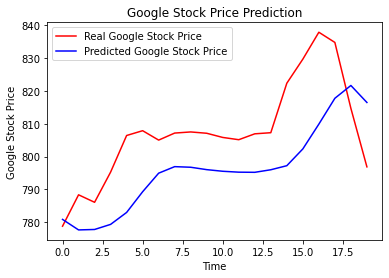

In [22]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()